In [1]:
# Imports needed libraries
import numpy as np
import matplotlib as plt
from matplotlib import pyplot

In [2]:
# The code was removed by Watson Studio for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checks for missing values
def check_for_missing_values(df):    
    missing_values = df.isnull()
    for feature in missing_values.columns.values.tolist():
        print(feature)
        print(missing_values[feature].value_counts())
        print()

check_for_missing_values(df)

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



# Missing values replacement

Features that contain missing data:  
__Embarked__: 2/889 missing values -> Replace by frequency    
__Cabin__: 687/891 missing values -> Not sure yet  
__Age__: 177/891 missing values -> Not sure yet  

In [4]:
# Replace Embarked missing values by frequency
df[['Embarked']].describe()

,Embarked
count,889
unique,3
top,S
freq,644


As shown above, 'S' is the most frequency value that appears in the data. So we replace the missing values with 'S'

In [5]:
df['Embarked'].replace(np.nan, 'S', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing values replacement on feature Cabin

In [6]:
df[['Cabin']].describe()

,Cabin
count,204
unique,147
top,G6
freq,4


Too much missing values on feature cabin and the most frequency value only appears 4 times, so it's better to drop the whole column? <br>
But instead of dropping the whole column, let's replace the values by the first character of the value ('B96' -> 'B')

In [7]:
# Change the cabin value
def change_cabin_value(x):    
    if str(x) == 'nan':
        return x
    return x[0]

df['Cabin'] = df['Cabin'].apply(change_cabin_value)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Prints the unique values in feature Cabin
df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [9]:
# Replaces missing values by 'M' (missing)
df['Cabin'].replace(np.nan, 'M', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


## Missing values replacement on feature Age

At first glance, we may want to replace missing ages by mean. However, replacing missing values by mean is unatural, since there will be a bunch of people that are on the same age. <br>
Instead, we can mark the missing values as 'M', which stands for 'missing' and then binning the ages.

In [10]:
# Replaces missing ages by 'M'
df['Age'].replace(np.nan, 'M', inplace = True)

In [11]:
# Check if all the missing values are replaced
check_for_missing_values(df)

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    891
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
False    891
Name: Cabin, dtype: int64

Embarked
False    891
Name: Embarked, dtype: int64



# Correct data format

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data format is as correct as we want

# Binning

In [13]:
# Takes a look at the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S


## Defines a function for binning

In [14]:
def bin_feature(df, feature, bins, bin_names):
    """ The functions that bins a feature of a dataframe
        df: the dataframe
        feature: the feature to be binned
        bins: the bins
        bin_names: the bin names    
    """
    binned_feature = []
    for value in df[feature]:
        hit = False
        try:
            float(value)
            for i in range(1, len(bins)):                
                if value >= bins[i - 1] and value < bins[i]:
                    binned_feature.append(bin_names[i - 1])
                    hit = True
                    break
        except ValueError:
            pass
        
        if not(hit):
            binned_feature.append(bin_names[-1])
    
    df[feature + '-binned'] = pd.Series(binned_feature)                                    

## Binning the features

In [15]:
# Bins the Age feature
age_bins = [0, 18, 35, 55, 100]
age_bin_names = ['Youth', 'Young adult', 'Adult', 'Senior', 'Unknow']
bin_feature(df, 'Age', age_bins, age_bin_names)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age-binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,Young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,Young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,Adult


In [16]:
# Investigation on Sib Sp
df[['SibSp']].describe()

,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


Text(0.5,1,'Number of siblings bins')

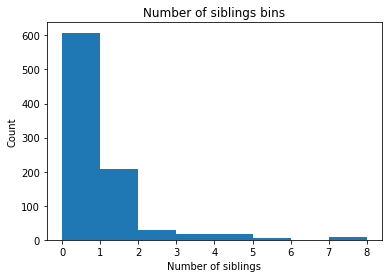

In [17]:
%matplotlib inline
plt.pyplot.hist(df['SibSp'], bins = 8)
plt.pyplot.xlabel('Number of siblings')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Number of siblings bins')

In [18]:
# Bins the SibSp feature
#sibsp_bins = [0, 1, 4, 100]
#sibsp_bin_names = ['No siblings', 'Few siblings', 'Many siblings']
#bin_feature(df, 'SibSp', sibsp_bins, sibsp_bin_names)
#df.head()

In [19]:
df[['Parch']].describe()

,Parch
count,891.000000
mean,0.381594
std,0.806057
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


Text(0.5,1,'Number of parches bins')

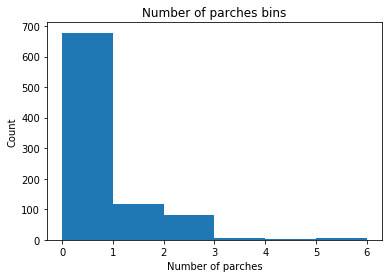

In [20]:
plt.pyplot.hist(df['Parch'], bins = 6)
plt.pyplot.xlabel('Number of parches')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Number of parches bins')

In [21]:
# Bins the Parch feature
#parch_bins = [0, 1, 3, 100]
#parch_bin_names = ['No parches', 'Few parches', 'Many parches']
#bin_feature(df, 'Parch', parch_bins, parch_bin_names)
#df.head()

# Create dummy features

In [22]:
# Defines a function for creating dummy features:
def create_dummy_features(df, feature):
    """ A function that creates dummy features for a feature
        df: the original dataframe
        feature: the feature that needs to get the dummies
        
        returns: the concated dataframe
    """
    dummies = pd.get_dummies(df[feature])
    new_name = {}
    for name in dummies.columns:
        new_name[name] = feature + '-' + name    
    dummies.rename(columns = new_name, inplace = True)    
    return_df = pd.concat([df, dummies], axis = 1)
    return_df.drop(feature, axis = 1, inplace = True)
    return return_df

In [23]:
#df = create_dummy_features(df, 'Age-binned')
#df.head()

In [24]:
df['Pclass'].replace(1, 'First class', inplace = True)
df['Pclass'].replace(2, 'Second class', inplace = True)
df['Pclass'].replace(3, 'Third class', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age-binned
0,1,0,Third class,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,Young adult
1,2,1,First class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,Third class,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,Young adult
3,4,1,First class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,Adult
4,5,0,Third class,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,Adult


In [25]:
df = create_dummy_features(df, 'Pclass')
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age-binned,Pclass-First class,Pclass-Second class,Pclass-Third class
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,Young adult,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,Adult,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,Young adult,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,Adult,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,Adult,0,0,1


In [32]:
!pwd

/home/dsxuser/work


In [33]:
df.to_csv('cleaned_df')

In [36]:
# Downloads the preprocessed file
import base64
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "cleaned_df.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)